Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

Merging 12 months of sales data into a single file

In [2]:
files = glob.glob(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Sales Analysis\Sales Data\*.csv')
df = pd.concat((pd.read_csv(f, on_bad_lines='skip') for f in files), ignore_index= True)

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [5]:
df = df.dropna()
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [6]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [7]:
df = df[df['Order ID'] != 'Order ID']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Adding Necessary Columns

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order_Month'] = df['Order Date'].dt.month_name()
df['Order_Year'] = df['Order Date'].dt.year
df['Time'] = df['Order Date'].dt.time
df['Hour'] = df['Order Date'].dt.hour

def bucket(h):
    if h < 6: 
        return "Night (00:00–05:59)"
    elif h <= 11: 
        return "Morning (06:00–11:59)"
    elif h <= 17: 
        return "Afternoon (12:00–17:59)"
    elif h <= 21: 
        return "Evening (18:00–21:59)"
    else: 
        return "Late Night (22:00–23:59)"

df['Time Category'] = df['Order Date'].dt.hour.apply(bucket)

df = df.drop(columns = 'Order Date')

C:\Users\jaraneses\AppData\Local\Temp\ipykernel_17208\3843728486.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [9]:
df['Total Sales'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)

In [10]:
df['City'] = df['Purchase Address'].apply(lambda x : x.split(",")[1])
df['State'] = df['Purchase Address'].apply(lambda x : x.split(",")[2])
df['House Number'] = df['Purchase Address'].apply(lambda x : x.split(",")[0].split(" ")[0])
df['Street'] = df['Purchase Address'].apply(lambda x : x.split(",")[0].split(" ")[1])
df = df.drop(columns = 'Purchase Address')

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Month,Order_Year,Time,Hour,Time Category,Total Sales,City,State,House Number,Street
0,176558,USB-C Charging Cable,2,11.95,April,2019,08:46:00,8,Morning (06:00–11:59),23.90,Dallas,TX 75001,917,1st
2,176559,Bose SoundSport Headphones,1,99.99,April,2019,22:30:00,22,Late Night (22:00–23:59),99.99,Boston,MA 02215,682,Chestnut
3,176560,Google Phone,1,600,April,2019,14:38:00,14,Afternoon (12:00–17:59),600.00,Los Angeles,CA 90001,669,Spruce
4,176560,Wired Headphones,1,11.99,April,2019,14:38:00,14,Afternoon (12:00–17:59),11.99,Los Angeles,CA 90001,669,Spruce
5,176561,Wired Headphones,1,11.99,April,2019,09:27:00,9,Morning (06:00–11:59),11.99,Los Angeles,CA 90001,333,8th


What was the best month for sales? How much was earned that month? 

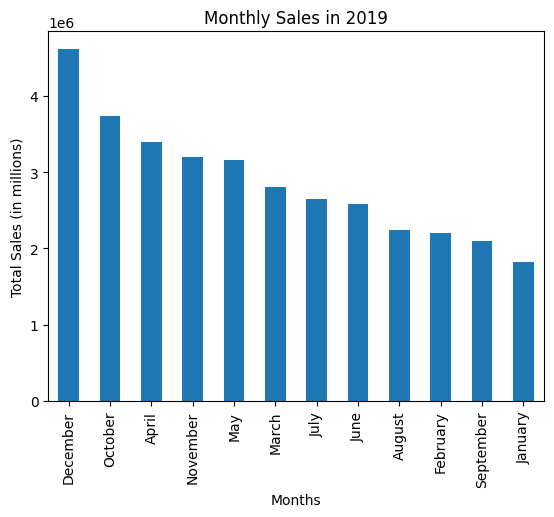

In [12]:
df.groupby('Order_Month')['Total Sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Monthly Sales in 2019')
plt.xlabel('Months')
plt.ylabel('Total Sales (in millions)')
plt.show()

What city had the highest number of sales? 

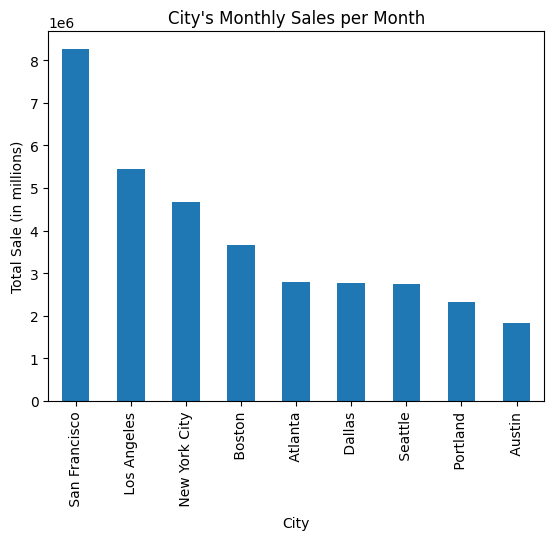

In [13]:
df.groupby('City')['Total Sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title("City's Monthly Sales per Month")
plt.xlabel('City')
plt.ylabel('Total Sale (in millions)')
plt.show()

What time should we display advertisements to maximize likelihood of customer's buying product?

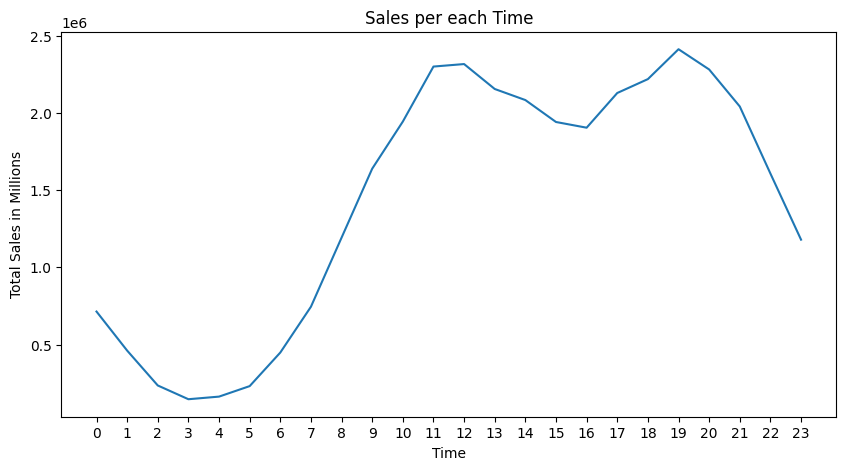

In [19]:
plt.figure(figsize=(10,5))
df.groupby('Hour')['Total Sales'].sum().plot(kind = 'line')
plt.title("Sales per each Time")
plt.xlabel('Time')
plt.ylabel('Total Sales in Millions')
plt.xticks(sorted(df['Hour'].unique()))
plt.show()

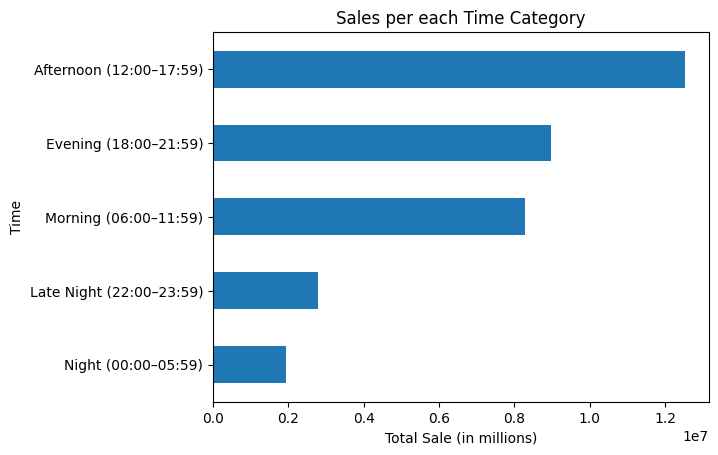

In [ ]:
df.groupby('Time Category')['Total Sales'].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.title("Sales per each Time Category")
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Time')
plt.show()

What products are most often sold together? 

In [ ]:
df2 = df[df.duplicated('Order ID', keep = False)]
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df2[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

C:\Users\jaraneses\AppData\Local\Temp\ipykernel_17208\4015038145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

pair_counts = Counter()

for s in df2['Grouped']:
    items = [p.strip() for p in s.split(',') if p.strip()]
    items = sorted(set(items))
    pair_counts.update(combinations(items, 2))

df_pairs = (
    pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count'])
      .assign(**{
          'Product A': lambda d: [a for a, b in d['Pair']],
          'Product B': lambda d: [b for a, b in d['Pair']],
      })
      .drop(columns='Pair')
      .sort_values('Count', ascending=False)
)

print(df_pairs.head(10))


    Count                   Product A             Product B
7    1011    Lightning Charging Cable                iPhone
1     997                Google Phone  USB-C Charging Cable
12    462            Wired Headphones                iPhone
0     422                Google Phone      Wired Headphones
17    373    Apple Airpods Headphones                iPhone
21    368        USB-C Charging Cable       Vareebadd Phone
8     228  Bose SoundSport Headphones          Google Phone
32    203        USB-C Charging Cable      Wired Headphones
39    149             Vareebadd Phone      Wired Headphones
64    129    Lightning Charging Cable      Wired Headphones


What product sold the most? Why do you think it sold the most?

Text(0, 0.5, 'Products')

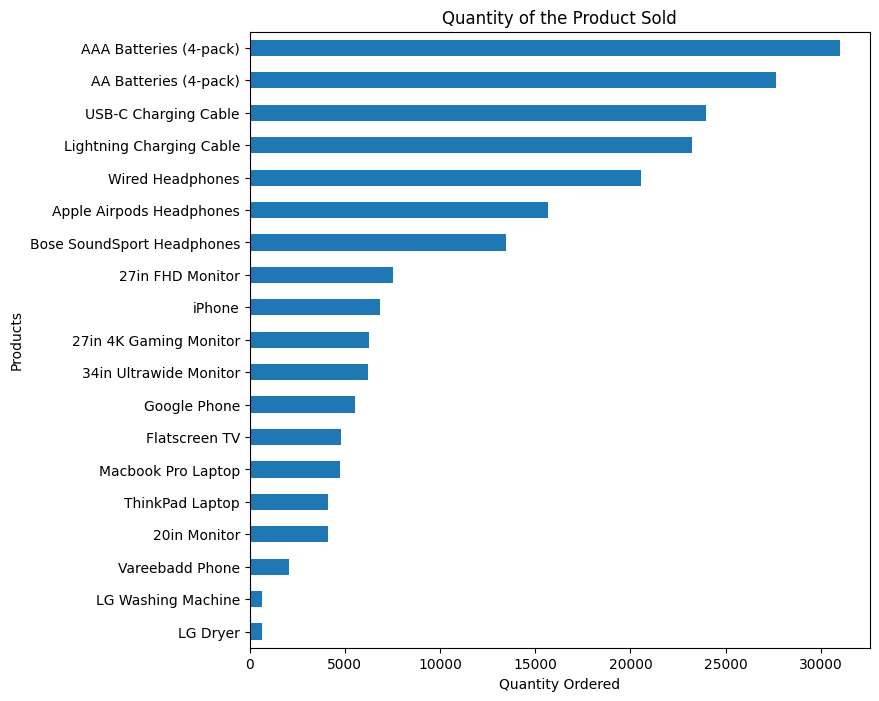

In [64]:
plt.figure(figsize = (8,8))
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending= True).plot(kind = 'barh')
plt.title('Quantity of the Product Sold')
plt.xlabel('Quantity Ordered')
plt.ylabel('Products')

In [69]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
prices = df.groupby('Product')['Price Each'].mean()

prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

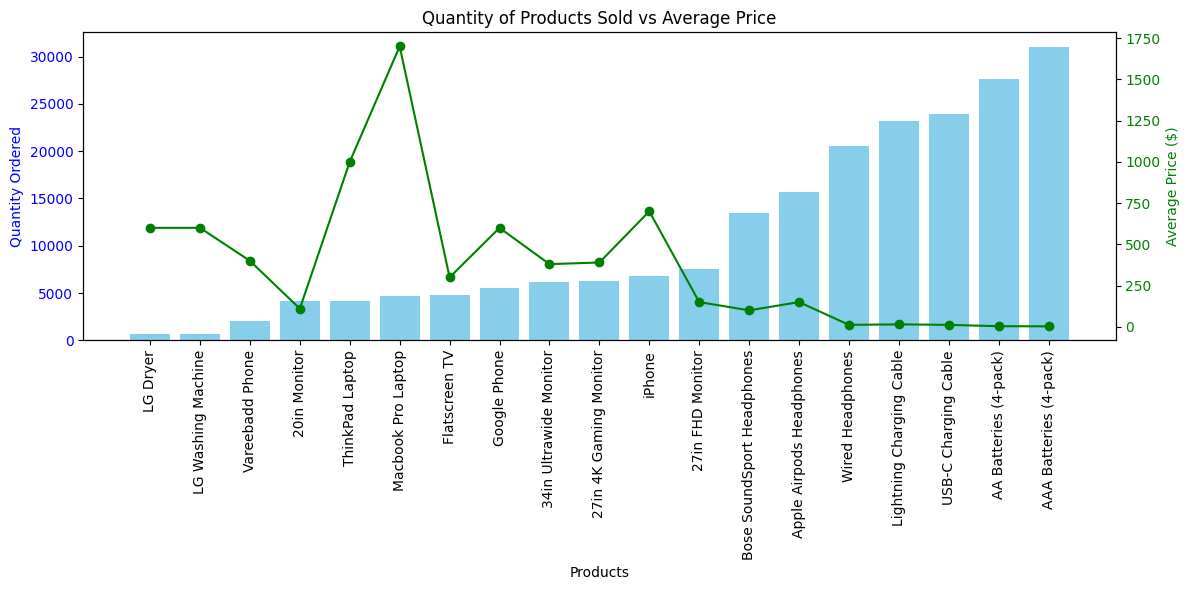

In [75]:

product_group = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)
prices = df.groupby('Product')['Price Each'].mean().reindex(product_group.index)

fig, ax1 = plt.subplots(figsize=(12,6))


ax1.bar(product_group.index, product_group.values, color='skyblue')
ax1.set_title("Quantity of Products Sold vs Average Price")
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


plt.xticks(rotation=90)


ax2 = ax1.twinx()
ax2.plot(product_group.index, prices.values, color='green', marker='o')
ax2.set_ylabel("Average Price ($)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

